<a href="https://colab.research.google.com/github/Krishnakumar-KKK/Krishnakumar-KKK/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Price predicting using past 60 days data**


> Using LSTM Recurrent Neural network - It uses sequential input data work with the Feed back using sequence of data- Input --> Encoder --> Decoder --> Dense--> Output



In [3]:
!pip install -q sklearn


In [4]:
%tensorflow_version 2.x

In [97]:
# import modules
import numpy as np
import math
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#import matplotlib.pyplot as plt,dates as mdates
from matplotlib import pyplot as plt, dates as mdates
from datetime import datetime as dt
import os
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')


In [68]:
#df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01',end='2021-12-17')
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2021-12-31']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
#df =web.DataReader("AAPL", "av-daily", start=datetime(2017, 2, 9),end=datetime(2017, 5, 24),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
#df =web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575915,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643500,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783868,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917507,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897018,394024400
...,...,...,...,...,...,...,...
2511,2021-12-23,175.850006,176.850006,175.270004,176.279999,176.055695,68356600
2512,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
2513,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
2514,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900


In [69]:
df.shape

(2516, 7)

In [70]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575915,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643500,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783868,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917507,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897018,394024400


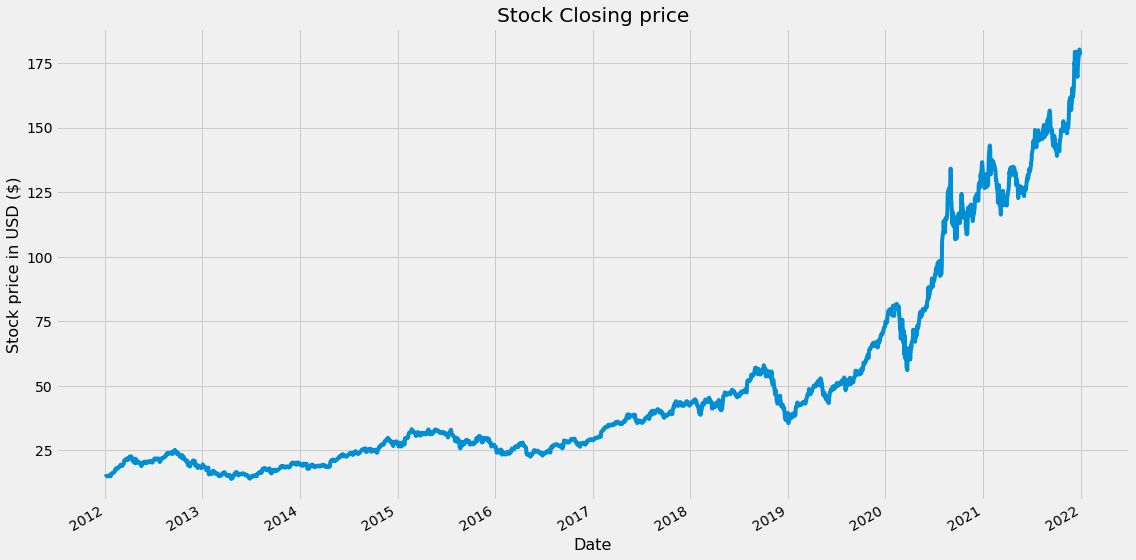

In [71]:



plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

dates = df['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = df['Close']
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
# Rotate and align the tick labels so they look better.

fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Stock Closing price')
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Stock price in USD ($)',fontsize=16)

plt.show()


In [74]:
# Df colum only contains close prime
Data = df.filter(['Close'])
#Convert the data frame to numpy array
Data_frame = Data.values
Training_length = int(len(Data_frame)*0.8)

In [77]:
from matplotlib.cm import ScalarMappable
#scaling Preprocessing Normalizing to 0-1
Scaling = MinMaxScaler(feature_range=(0,1))
scaled_data = Scaling.fit_transform(Data_frame)
scaled_data

array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.99374929],
       [0.99429028],
       [0.98719814]])

In [103]:
# Splitting Training and testing data set
Train_dataset = scaled_data[0:Training_length,:]
Testing_dataset = scaled_data [Training_length-60:,:]
x_train=[]
y_train=[]
for i in range (60,len(Train_dataset)):
  x_train.append(Train_dataset[i-60:i,0])
  y_train.append(Train_dataset[i])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702126, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791636, 0.00641379,
       0.0120484 , 0.01161266, 0.01218149, 0.01341143, 0.01415627,
       0.01409403, 0.01386435, 0.01484317, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552853,
       0.02299779, 0.0239723 , 0.02395299, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304347, 0.03319589, 0.03061578, 0.02999328, 0.03008559,
       0.03251115, 0.03319374, 0.03465982, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549972,
       0.04482143, 0.04411522, 0.04646135, 0.04807125, 0.04874526])]
[array([0.04707955])]

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702126, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00

In [94]:
#Convering into numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshaping of data

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

x_train.shape

In [100]:
# Creating model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [101]:
model.compile (optimizer='adam',loss='mean_squared_error')

In [102]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1952/1952 [==============================] - 44s 21ms/step - loss: 1.6139e-04


In [105]:
# Splitting Training and testing data set
Train_dataset = scaled_data[0:Training_length,:]
Testing_dataset = scaled_data [Training_length-60:,:]
x_test=[]
y_test=scaled_data[Training_length:,:]
for i in range (60,len(Testing_dataset)):
  x_test.append(Testing_dataset[i-60:i,0])
  

In [108]:
#Converting into numpy
x_test,y_test = np.array(x_test),np.array(y_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

x_test.shape


(504, 60, 1)

In [112]:
prediction = model.predict(x_test)
prediction = Scaling.inverse_transform(prediction)


In [115]:
data = df
train_data = data[0:Training_length]
Valid = data[Training_length:]
Valid['Prediction']=prediction



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


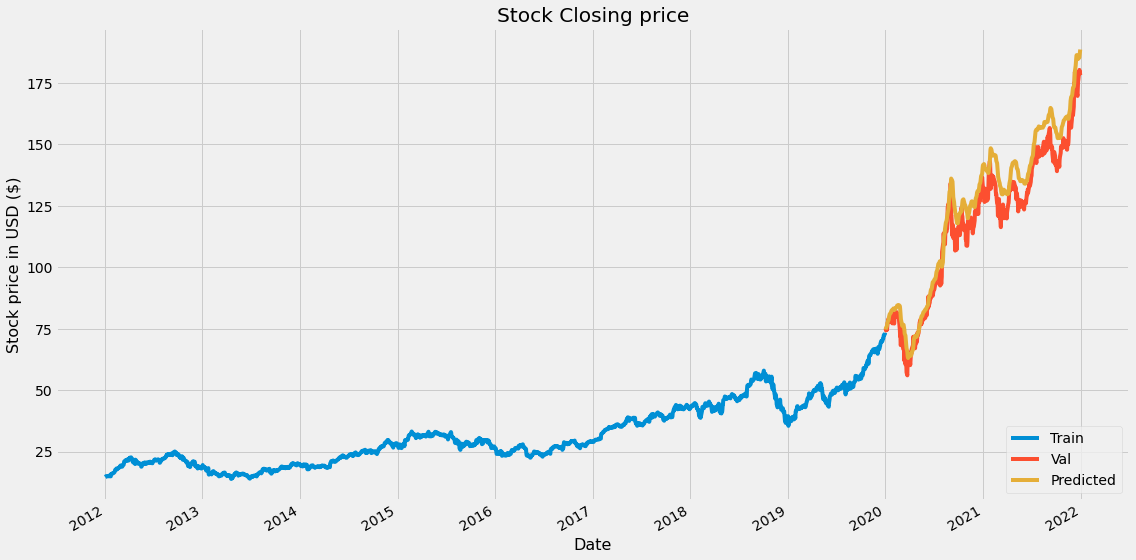

In [116]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True

dates = train_data['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = train_data['Close']
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
# Rotate and align the tick labels so they look better.
dates = Valid['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = Valid['Close']


ax.plot(x_values, y_values)


dates = Valid['Date']
x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
y_values = Valid['Prediction']


ax.plot(x_values, y_values)

fig.autofmt_xdate()


# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Stock Closing price')
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Stock price in USD ($)',fontsize=16)
plt.legend(['Train','Val','Predicted'],loc='lower right')
plt.show()
